In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
irri = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Dataset\archive\irrigation_machine.csv")
# Fix column name typo if present
irri.rename(columns={"nnamed: 0": "Unnamed: 0"}, inplace=True)

# Drop index column
if "Unnamed: 0" in irri.columns:
    irri.drop(columns=["Unnamed: 0"], inplace=True)

irri

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,...,1.0,2.0,3.0,2.0,1.0,1.0,0.0,0,0,0
1996,1.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,5.0,...,3.0,3.0,0.0,1.0,0.0,6.0,2.0,1,1,1
1997,1.0,3.0,3.0,1.0,1.0,4.0,8.0,1.0,0.0,0.0,...,2.0,3.0,4.0,4.0,4.0,1.0,0.0,1,0,0
1998,2.0,1.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0,0.0,...,2.0,4.0,0.0,2.0,0.0,3.0,0.0,0,1,0


In [4]:
irri.isnull().sum()

sensor_0     0
sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
parcel_0     0
parcel_1     0
parcel_2     0
dtype: int64

In [5]:
irri.head() 

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


<Axes: ylabel='Count'>

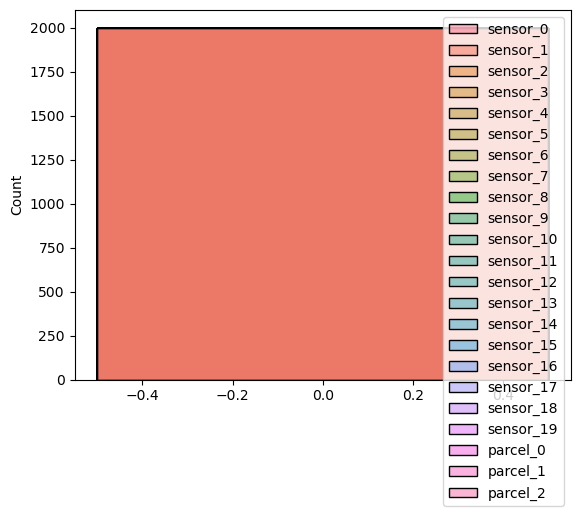

In [6]:
sns.histplot(irri.isnull())

In [7]:
print(irri.shape)
print(irri.isnull().sum().sum())  # should be 0


(2000, 23)
0


In [8]:



import plotly.express as px
import plotly.graph_objects as go

parcel_counts = irri["parcel_0"].value_counts().reset_index()
parcel_counts.columns = ["Irrigation", "Count"]

parcel_counts["Irrigation"] = parcel_counts["Irrigation"].map({
    0: "No Irrigation",
    1: "Irrigation Required"
})

fig = px.pie(
    parcel_counts,
    names="Irrigation",
    values="Count",
    
    title="Smart Irrigation Decision Distribution",
    hole=0.4,
    template = "plotly_dark"
)

fig.show()


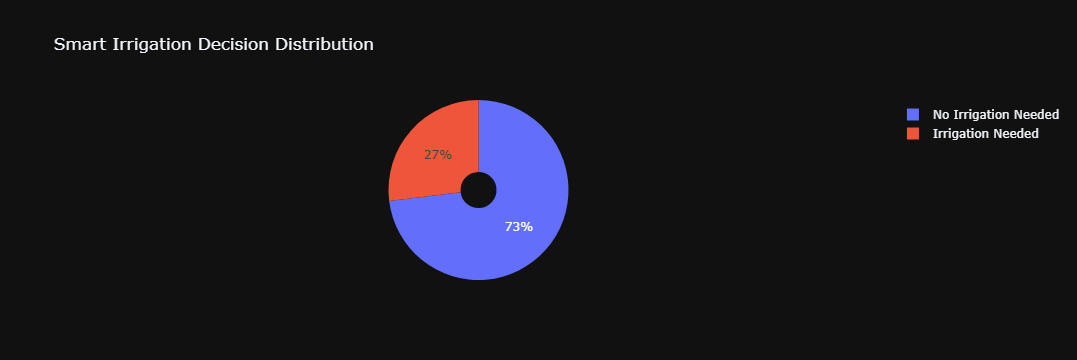

In [13]:
perce_count = irri["parcel_1"].value_counts().reset_index()
perce_count.columns = ["Irrigation","Count"]
perce_count["Irrigation"] = perce_count["Irrigation"].map({
    0: "Irrigation Needed",
    1: "No Irrigation Needed"
})
fig = px.pie(perce_count,names="Irrigation",values="Count",title="Smart Irrigation Decision Distribution",hole=0.2,template="plotly_dark")
fig.show()

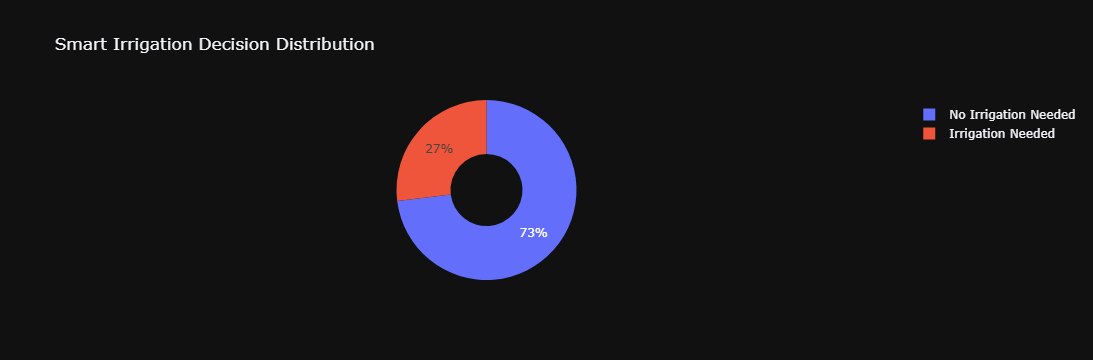

In [10]:
perce_count = irri["parcel_1"].value_counts().reset_index()
perce_count.columns = ["Irrigation", "Count"]
perce_count["Irrigation"] = perce_count["Irrigation"].map({
    0: "Irrigation Needed",
    1: "No Irrigation Needed"
})
fig = px.pie(perce_count, names="Irrigation", values="Count", 
             title="Smart Irrigation Decision Distribution", hole=0.4, template="plotly_dark")
fig.show()

In [11]:
per_count = irri["parcel_2"].value_counts().reset_index()
per_count.columns = ["Irrigation","Counts"]
per_count["Irrigation"] = per_count["Irrigation"].map({
    0:"Irrigation Need",
    1:"No Need of Irrigation"
})
tu = px.pie(per_count,names="Irrigation",values="Counts",hole=0.04,template="plotly_dark",
           title="Smart Irrigation Decsion Distribution percel_2")
fig.show()

<Axes: ylabel='count'>

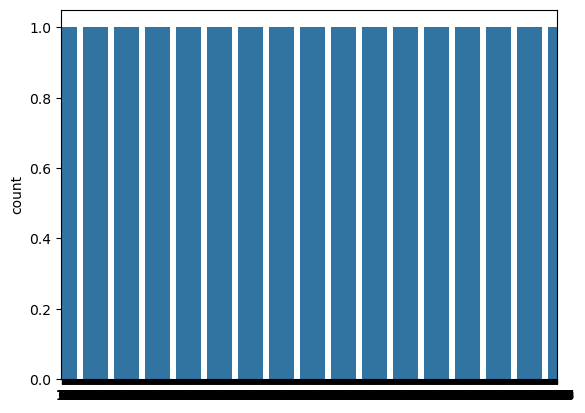

In [11]:
sns.countplot(irri["parcel_0"])

<Axes: xlabel='parcel_0'>

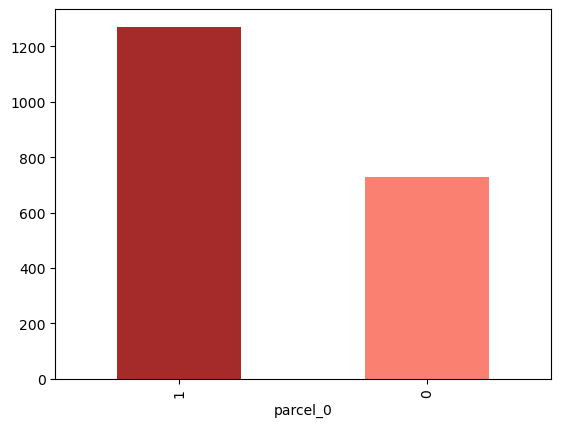

In [12]:
irri.parcel_0.value_counts().plot(kind="bar",color=["Brown","salmon"])

<Axes: ylabel='Frequency'>

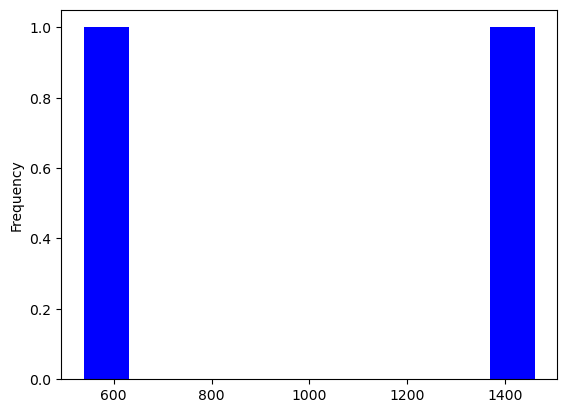

In [13]:
irri.parcel_1.value_counts().plot(kind="hist",color=["Blue","green"])

ValueError: count is not a valid plot kind Valid plot kinds: ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')

So in this error i will learn that i can not able to use this count in the variable kind because it is not a vlaid point 

<Axes: ylabel='count'>

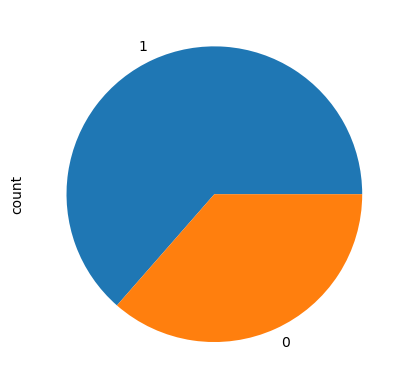

In [14]:
irri.parcel_0.value_counts().plot(kind="pie")

In [15]:
irri

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,...,1.0,2.0,3.0,2.0,1.0,1.0,0.0,0,0,0
1996,1.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,5.0,...,3.0,3.0,0.0,1.0,0.0,6.0,2.0,1,1,1
1997,1.0,3.0,3.0,1.0,1.0,4.0,8.0,1.0,0.0,0.0,...,2.0,3.0,4.0,4.0,4.0,1.0,0.0,1,0,0
1998,2.0,1.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0,0.0,...,2.0,4.0,0.0,2.0,0.0,3.0,0.0,0,1,0


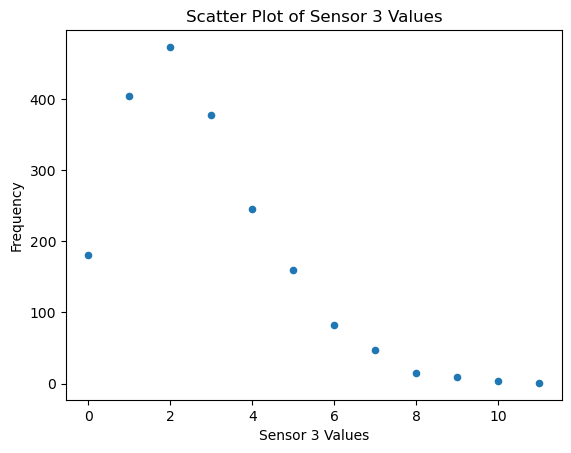

In [16]:
# Convert the Series to a DataFrame for scatter plot
import pandas as pd
import matplotlib.pyplot as plt

# Assuming irri.sensor_3.value_counts() gives you frequency counts
counts = irri.sensor_3.value_counts()

# Create a DataFrame with the values and their counts
df = pd.DataFrame({
    'sensor_value': counts.index,  # The unique values from sensor_3
    'frequency': counts.values     # The count of each value
})

# Now create a scatter plot
df.plot(kind="scatter", x="sensor_value", y="frequency")
plt.xlabel('Sensor 3 Values')
plt.ylabel('Frequency')
plt.title('Scatter Plot of Sensor 3 Values')
plt.show()

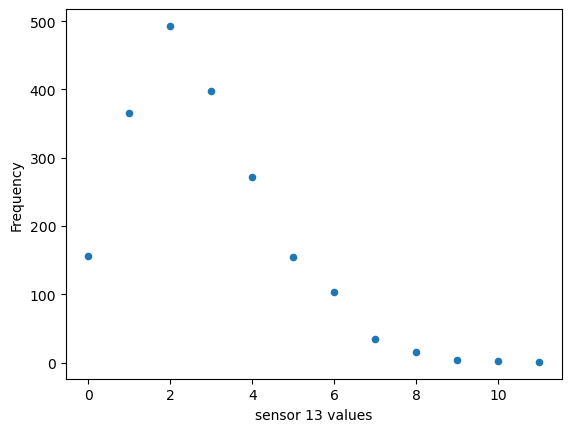

In [17]:
count = irri.sensor_13.value_counts()
df = pd.DataFrame({
    "sensor 13 values":count.index,
     "Frequency":count.values


})
df.plot(kind="scatter",x="sensor 13 values",y="Frequency")
plt.xlabel = ("Sensor 13 values")
plt.ylabel = ("Frequency")
plt.title = ("Sensor 13 data represent")
plt.show()

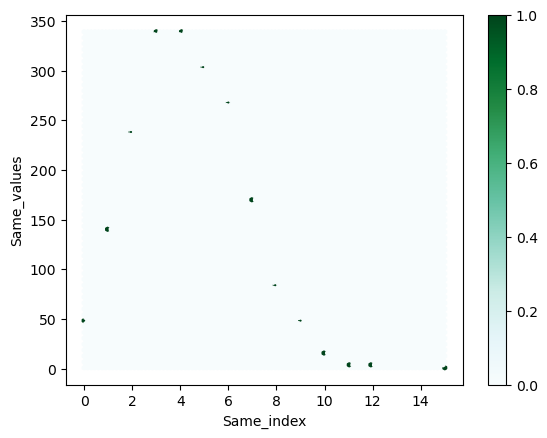

In [18]:
count = irri.sensor_12.value_counts()
df = pd.DataFrame({
    "Same_index":count.index,
    "Same_values":count.values
    
})
df.plot(kind="hexbin",x="Same_index",y="Same_values")
plt.xlabel = ("Same_index")
plt.ylabel = ("Same_values")
plt.title = ("Let's do the HexBin chat")
plt.show()

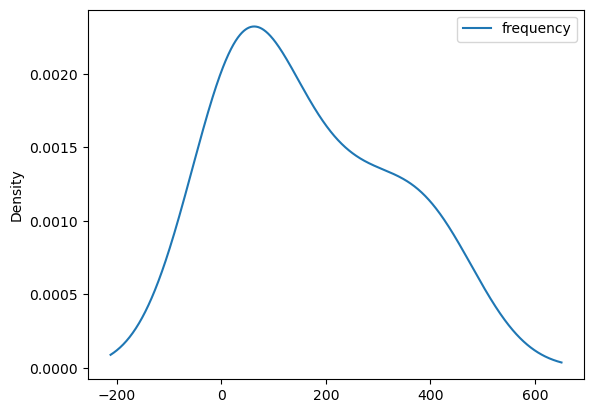

In [19]:
count = irri.sensor_14.value_counts()
df = pd.DataFrame({
    "sensor 14 values":count.index,
    "frequency":count.values
    
})
df.plot(kind="kde",x="sensor 14 values",y="frequency")
plt.xlabel = ("Sensor 14 values")
plt.ylabel = ("Frequency")
plt.title = ("Sensor count values")
plt.show()

## Feature Engineering 

In [20]:
X = irri[[f"sensor_{i}"for i in range(20)]]
y  = irri["parcel_0"]

In [21]:
X_train,X_test,y_train,y_test = (train_test_split(X,y,random_state=42,test_size=0.4))
                                 

In [22]:
X_train

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
798,2.0,0.0,5.0,1.0,2.0,1.0,5.0,6.0,0.0,0.0,2.0,4.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0
1102,1.0,2.0,3.0,3.0,1.0,0.0,8.0,2.0,0.0,3.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,6.0,2.0
105,3.0,1.0,5.0,4.0,4.0,6.0,2.0,1.0,3.0,4.0,1.0,5.0,1.0,4.0,2.0,2.0,2.0,2.0,6.0,3.0
126,0.0,1.0,2.0,5.0,1.0,1.0,0.0,4.0,1.0,6.0,4.0,3.0,5.0,3.0,3.0,0.0,2.0,0.0,5.0,2.0
1995,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,3.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,2.0,4.0,2.0,4.0,1.0,4.0,5.0,3.0,5.0,4.0,1.0,3.0,2.0,2.0,4.0,3.0,5.0,3.0,1.0,5.0
1294,6.0,1.0,0.0,1.0,2.0,2.0,1.0,3.0,2.0,3.0,3.0,2.0,3.0,1.0,5.0,4.0,0.0,2.0,4.0,3.0
860,2.0,2.0,1.0,2.0,1.0,2.0,5.0,3.0,1.0,4.0,0.0,2.0,4.0,2.0,5.0,1.0,2.0,6.0,4.0,1.0
1459,3.0,2.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,4.0,0.0,2.0,1.0,2.0,0.0,2.0,2.0,3.0,0.0,1.0


In [23]:
X_test

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
1860,3.0,4.0,4.0,2.0,5.0,2.0,3.0,6.0,2.0,1.0,1.0,2.0,2.0,3.0,3.0,0.0,4.0,0.0,1.0,2.0
353,1.0,4.0,0.0,3.0,1.0,4.0,2.0,5.0,3.0,1.0,2.0,3.0,5.0,3.0,1.0,4.0,4.0,1.0,2.0,1.0
1333,2.0,0.0,5.0,5.0,4.0,0.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0,6.0,2.0,0.0,5.0,0.0,1.0,1.0
905,0.0,2.0,6.0,2.0,4.0,0.0,1.0,7.0,0.0,1.0,1.0,4.0,4.0,4.0,5.0,1.0,3.0,1.0,2.0,0.0
1289,3.0,1.0,5.0,0.0,3.0,0.0,5.0,8.0,0.0,1.0,3.0,1.0,1.0,0.0,3.0,1.0,5.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,0.0,1.0,7.0,1.0,3.0,1.0,1.0,5.0,4.0,0.0,5.0,2.0,4.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0
461,1.0,1.0,2.0,3.0,2.0,0.0,6.0,4.0,0.0,2.0,1.0,4.0,5.0,2.0,2.0,3.0,4.0,3.0,0.0,2.0
1302,1.0,3.0,3.0,6.0,2.0,1.0,1.0,3.0,1.0,2.0,2.0,3.0,7.0,3.0,3.0,2.0,0.0,0.0,4.0,1.0
1176,5.0,4.0,1.0,2.0,5.0,3.0,3.0,8.0,1.0,2.0,3.0,5.0,0.0,3.0,8.0,0.0,3.0,1.0,1.0,3.0


In [24]:
y_train

798     1
1102    1
105     0
126     0
1995    0
       ..
1130    0
1294    0
860     1
1459    0
1126    1
Name: parcel_0, Length: 1200, dtype: int64

In [25]:
Model = RandomForestClassifier(n_estimators = 100,max_depth=20,random_state=42)
Model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
y_pred = Model.predict(X_test)
print("Accuracy_score",accuracy_score(y_test,y_pred))
print(classification_report(y_test , y_pred))

Accuracy_score 0.86375
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       296
           1       0.86      0.93      0.90       504

    accuracy                           0.86       800
   macro avg       0.86      0.84      0.85       800
weighted avg       0.86      0.86      0.86       800



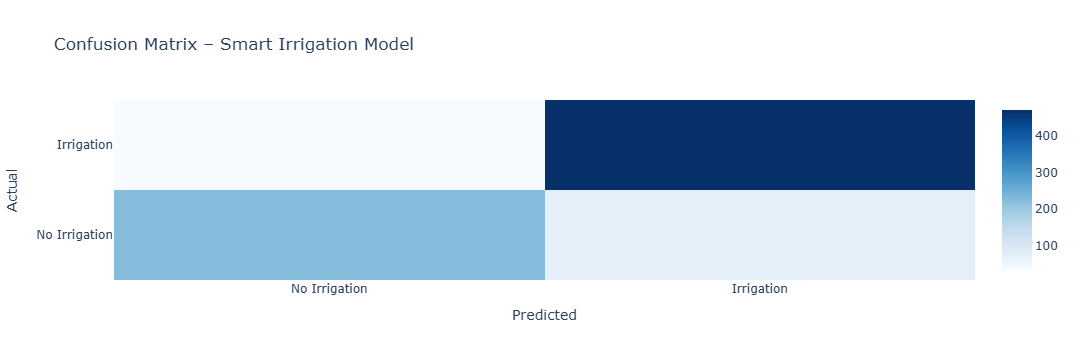

In [29]:
cm = confusion_matrix(y_test, y_pred)

fig = go.Figure(
    data=go.Heatmap(
        z=cm,
        x=["No Irrigation", "Irrigation"],
        y=["No Irrigation", "Irrigation"],
        colorscale="Blues",
        showscale=True
    )
)

fig.update_layout(
    title="Confusion Matrix – Smart Irrigation Model",
    xaxis_title="Predicted",
    yaxis_title="Actual"
)

fig.show()


In [34]:
def predict_irrigation(sensor_values):
    """
    sensor_values = list of 20 sensor readings
    """
    data = np.array(sensor_values).reshape(1, -1)
    prediction = Model.predict(data)[0]

    return "Irrigation ON" if prediction == 1 else "Irrigation OFF"


In [36]:
sample_sensor = [2,1,3,4,2,1,1,2,3,1,0,2,1,3,2,1,0,2,3,1]
print(predict_irrigation(sample_sensor))


Irrigation OFF


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [37]:
import numpy as np

def predict_irrigation(sensor_values):
    if len(sensor_values) != 20:
        return {"error": "20 sensor values required"}

    data = np.array(sensor_values).reshape(1, -1)

    prediction = Model.predict(data)[0]
    probability = Model.predict_proba(data)[0][1]  # confidence for class 1

    return {
        "prediction": "Irrigation ON" if prediction == 1 else "Irrigation OFF",
        "confidence": round(probability * 100, 2)
    }


In [38]:
sample_sensor = [2,1,3,4,2,1,1,2,3,1,0,2,1,3,2,1,0,2,3,1]
print(predict_irrigation(sample_sensor))


{'prediction': 'Irrigation OFF', 'confidence': np.float64(27.0)}


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [39]:
import joblib

joblib.dump(Model, "smart_irrigation_model.pkl")
print("✅ Model saved successfully")


✅ Model saved successfully


In [40]:
import joblib

Model = joblib.load("smart_irrigation_model.pkl")
print("✅ Model loaded successfully")


✅ Model loaded successfully
